## Lab 1 - Analyzing Real Estate log sessions
We have data from Yandex.Realty classified https://realty.yandex.ru containing real estate user sessions logs. In thуыу lab your main goal is to explore this sessions and extract some knowledge from them. 
For datasets like this it becomes hard to use Excel because of its size. If you learn how to work with pandas you'll be able to do basic analytical research much faster than in Excel. To execute code IPython notebook click on the Cell and press Shift-Enter. If you don't have any experience with Jupyter notebooks, please look at this tutorial: https://mybinder.org/v2/gh/ipython/ipython-in-depth/master?filepath=binder/Index.ipynb

### Main objectives
After successful completion of the lab work students will be able to:

- Analyze large datasets that don't work well in Excel using IPython notebook and pandas library
- Extract data for product metrics from logs
- Build new metrics which are important for product growth
### Tasks
- Make base exploratory data analysis (https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python) 
- Find % of calls by different realty types
- Find % of empty searches and why
- Analyze platform distribution 

In [1]:
# let's import pandas library and set options to be able to view data right in the browser
# Assign pd for a short alias for pandas library
import pandas as pd
# Call set_option function fron pandas library to edit them limit for number of the displayed
# columns, width of all columns and maximum width of one column
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)

In [2]:
###Let's import additional libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:

df = pd.read_table(r'C:\Users\asd\Desktop\user_sessions_export.tsv')

In [5]:
#Explore dataframe shapes
df.shape

(78436, 37)

In [6]:
#And look into it's structure
df.head()

,card_view_type,room_rooms_offered,site_id,offer_category,garage_type,query_text,anonymized_user_id,total_results,rgid,house_type,primary_sale,client_type,apartment_rooms_total,rent_price,parking_type,apartment_total_area,rereferer,event_type,timestamp,apartment_flat_type,query_id,offer_type,commercial_type_list,fastlink,title,subject_federation_id,pricing_period,web_referer,offer_id,developer_id_list,event_place,revoked,apartment_floor,village_id,page_number,sell_price,room_rooms_total
0,USED,1.0,NaN,ROOMS,NaN,50759f78c459038f9772ba023b9f711f,ac395e970bd92e6dac60576914f40431,0,417899.0,NaN,NaN,TOUCH_PAD,NaN,13500.0,NaN,NaN,https://realty.yandex.ru/sankt-peterburg/snyat/komnata/?subLocality=417975&page=1,CARD_SHOW,1598358743000000,NaN,50759f78c459038f9772ba023b9f711f,RENT,NaN,False,NaN,10174.0,PRICING_PERIOD_UNKNOWN,https://realty.yandex.ru/offer/6053180953082735872/?isExact=YES,6.053181e+18,NaN,CARD_TOP,False,NaN,NaN,0,NaN,5.0
1,UNKNOWN,NaN,NaN,OFFER_CATEGORY_UNKNOWN,NaN,93684c83d8f27359373157f92e33ce8c,12205865945ca3f9545080d9b268b98f,38,NaN,NaN,NaN,TOUCH_PHONE,NaN,NaN,NaN,NaN,https://m.realty.yandex.ru/sankt-peterburg/kupit/novostrojka/novaya-ohta-2145/?from=yandex_wizard_maps&roomsTotal=2,SEARCH_SHOW,1598382056000000,NaN,93684c83d8f27359373157f92e33ce8c,OFFER_TYPE_UNKNOWN,NaN,True,1 комната,NaN,NaN,https://m.realty.yandex.ru/sankt-peterburg/kupit/kvartira/dvuhkomnatnaya/?siteId=2145&primarySale=NO,NaN,NaN,UNKNOWN,False,NaN,NaN,0,NaN,NaN
2,USED,1.0,NaN,ROOMS,NaN,d3be00de046fdbdd2a2b5d64dc7d01b7,9bd0f7b1c5d39ed35e0f3dbfabda91f1,0,417899.0,NaN,NaN,DESKTOP,NaN,15000.0,NaN,NaN,https://realty.yandex.ru/sankt-peterburg/snyat/komnata/karta/?utm_source=main_stripe_big&leftLongitude=30.240695&topLatitude=59.946513&rightLongitude=30.303008&bottomLatitude=59.934068&zoom=15&activePoint=59.935013%2C30.270548,CARD_SHOW,1598303939000000,NaN,d3be00de046fdbdd2a2b5d64dc7d01b7,RENT,NaN,False,NaN,10174.0,PRICING_PERIOD_UNKNOWN,https://realty.yandex.ru/offer/2873837982416659969/?isExact=YES,2.873838e+18,NaN,CARD_TOP,False,NaN,NaN,0,NaN,3.0
3,UNKNOWN,NaN,NaN,OFFER_CATEGORY_UNKNOWN,NaN,0a128a65f5a0b46c63b775c7cb8ed143,f9e6354e22bedcc4cc77c5ff0cf78de6,1828,417899.0,NaN,NaN,TOUCH_PHONE,NaN,NaN,NaN,NaN,https://m.realty.yandex.ru/sankt-peterburg/snyat/kvartira/dvuhkomnatnaya/?cardIndex=19&isExact=YES&page=4&sort=PRICE,SEARCH_SHOW,1598352595000000,NaN,0a128a65f5a0b46c63b775c7cb8ed143,OFFER_TYPE_UNKNOWN,NaN,False,NaN,0.0,NaN,https://m.realty.yandex.ru/sankt-peterburg/snyat/kvartira/dvuhkomnatnaya/?cardIndex=19&isExact=YES&page=5&sort=PRICE,NaN,NaN,LISTING,False,NaN,NaN,5,NaN,NaN
4,USED,NaN,NaN,APARTMENT,NaN,2e20edcf02c3a12be6bed4c0b47033a9,114e45ee149da8be73ae5b051c9292c3,0,417899.0,NaN,False,DESKTOP,2.0,NaN,NaN,44.5,https://realty.yandex.ru/sankt-peterburg/kupit/kvartira/dvuhkomnatnaya/?subLocality=417979&metroGeoId=20319&priceMax=4650000&metroTransport=ON_FOOT&timeToMetro=20,CARD_SHOW,1598364660000000,FLAT_TYPE_SECONDARY,2e20edcf02c3a12be6bed4c0b47033a9,SELL,NaN,False,NaN,10174.0,NaN,https://realty.yandex.ru/offer/5439578279210637569/?isExact=NO,5.439578e+18,NaN,CARD_TOP,False,0.0,NaN,0,4680000.0,NaN


In [7]:
df.columns

Index(['card_view_type', 'room_rooms_offered', 'site_id', 'offer_category', 'garage_type', 'query_text', 'anonymized_user_id', 'total_results', 'rgid', 'house_type', 'primary_sale', 'client_type', 'apartment_rooms_total', 'rent_price', 'parking_type', 'apartment_total_area', 'rereferer', 'event_type', 'timestamp', 'apartment_flat_type', 'query_id', 'offer_type', 'commercial_type_list', 'fastlink', 'title', 'subject_federation_id', 'pricing_period', 'web_referer', 'offer_id', 'developer_id_list', 'event_place', 'revoked', 'apartment_floor', 'village_id', 'page_number', 'sell_price', 'room_rooms_total'], dtype='object')

# Here is the description of some our features and some of them not:

|  Name  | Description 
|---         |---       
| **card_view_type** | realty type in card 
| **room_rooms_offered** | quantity of rooms
| **site_id** | quantity of rooms
| **total_results** | quantity of results for 1 query
| **rgid** | region_id
| **primary_sale** | sale agent
| **event_type** | log event type
| **apartment_flat_type** | new or old flat
| **query_id** | session id for one search
| **offer_type** | SELL or RENT
| **event_place** | interface part where was done this action





In [8]:
#Let's clean dirty data from logs or useless features
df.drop(["rereferer", "fastlink","title","subject_federation_id","developer_id_list","revoked"], axis = 1, inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78436 entries, 0 to 78435
Data columns (total 31 columns):
card_view_type           78436 non-null object
room_rooms_offered       1874 non-null float64
site_id                  10530 non-null float64
offer_category           78436 non-null object
garage_type              35 non-null object
query_text               78436 non-null object
anonymized_user_id       78436 non-null object
total_results            78436 non-null int64
rgid                     67645 non-null float64
house_type               3690 non-null object
primary_sale             19450 non-null object
client_type              78436 non-null object
apartment_rooms_total    23226 non-null float64
rent_price               11464 non-null float64
parking_type             35 non-null object
apartment_total_area     23226 non-null float64
event_type               78436 non-null object
timestamp                78436 non-null int64
apartment_flat_type      23226 non-null object
qu

In [10]:
#And split dataset into 3 parts (SEARCH, CARD_SHOW, PHONE_SHOW)
df['event_type'].value_counts()

SEARCH_SHOW    45253
CARD_SHOW      32159
PHONE_SHOW      1024
Name: event_type, dtype: int64

In [11]:
search_df = df[df['event_type']=='SEARCH_SHOW']
card_show_df = df[df['event_type']=='CARD_SHOW']
phone_show_df = df[df['event_type']=='PHONE_SHOW']

## The main feature in this log is a phone call from the user, let's explore this feature and it's dependency on card_view_type

In [12]:
phone_show_df.head()

,card_view_type,room_rooms_offered,site_id,offer_category,garage_type,query_text,anonymized_user_id,total_results,rgid,house_type,primary_sale,client_type,apartment_rooms_total,rent_price,parking_type,apartment_total_area,event_type,timestamp,apartment_flat_type,query_id,offer_type,commercial_type_list,pricing_period,web_referer,offer_id,event_place,apartment_floor,village_id,page_number,sell_price,room_rooms_total
19,USED,NaN,NaN,APARTMENT,NaN,821669dbf91fe78557f5cd999c9aaca9,74563c185aadc85ca2c04a5d96a4cd2e,0,12395.0,NaN,False,TOUCH_PHONE,1.0,NaN,NaN,29.299999,PHONE_SHOW,1598364757000000,FLAT_TYPE_SECONDARY,821669dbf91fe78557f5cd999c9aaca9,SELL,NaN,NaN,https://m.realty.yandex.ru/moskva/kupit/kvartira/odnokomnatnaya/?from=wizard.general&nosplash=1&rgid=417965&utm_campaign=buy&utm_medium=flat.one_room&utm_source=wizard&page=5,5.437294e+18,LISTING,0.0,NaN,0,2350000.0,NaN
83,COMMERCIAL,NaN,NaN,COMMERCIAL,NaN,c0c113b2af458351ae4c5b8f1a1fc05b,fcf0c70f72fc7a20bffaf68e0db004aa,0,417899.0,NaN,NaN,DESKTOP,NaN,5000.0,NaN,NaN,PHONE_SHOW,1598384638000000,NaN,c0c113b2af458351ae4c5b8f1a1fc05b,RENT,COMMERCIAL_TYPE_LEGAL_ADDRESS,PRICING_PERIOD_UNKNOWN,https://realty.yandex.ru/sankt-peterburg/snyat/kommercheskaya-nedvizhimost/yuridicheskij-adres/?nosplash=1&from=wizard.offers&utm_source=wizard&utm_campaign=rent.large.prod_personal_newbuilding&utm_medium=commercial,3.157576e+18,LISTING,NaN,NaN,0,NaN,NaN
107,USED,NaN,NaN,APARTMENT,NaN,3c82e7e5926dcb77f088d41051bea031,7bfa39e50b9462d85e61d90cafcc3ae6,0,417899.0,NaN,False,DESKTOP,0.0,NaN,NaN,26.000000,PHONE_SHOW,1598345324000000,FLAT_TYPE_SECONDARY,3c82e7e5926dcb77f088d41051bea031,SELL,NaN,NaN,https://realty.yandex.ru/sankt-peterburg/kupit/kvartira/studiya/?address=%D1%82%D1%83%D1%80%D0%BA%D1%83&nosplash=1&from=wizard.offers&pinnedOfferId=6120913633538585601&utm_source=wizard&utm_campaign=buy.realty_pars&utm_medium=flat.studio,6.120914e+18,LISTING,0.0,NaN,0,4100000.0,NaN
280,USED,NaN,14921.0,APARTMENT,NaN,ca61bd1e6a0e307f1df823ed5905980d,424e94882e6972f31b96d9dbac8d224c,0,17393990.0,NaN,NaN,DESKTOP,1.0,20000.0,NaN,31.000000,PHONE_SHOW,1598337347000000,FLAT_TYPE_UNKNOWN,ca61bd1e6a0e307f1df823ed5905980d,RENT,NaN,PRICING_PERIOD_UNKNOWN,https://realty.yandex.ru/offer/6447427550676087296/#location,6.447428e+18,CARD_TOP,0.0,NaN,0,NaN,NaN
296,USED,NaN,NaN,APARTMENT,NaN,f795d5cf3d811b6319a7cc96ff8d152d,b139c0a0b22a9013c1a0ddaed0c31153,0,417899.0,NaN,False,DESKTOP,3.0,NaN,NaN,62.000000,PHONE_SHOW,1598362620000000,FLAT_TYPE_SECONDARY,f795d5cf3d811b6319a7cc96ff8d152d,SELL,NaN,NaN,https://realty.yandex.ru/offer/481686316481205761/,4.816863e+17,CARD_TOP,0.0,NaN,0,8300000.0,NaN


In [13]:
phone_show_df['card_view_type'].value_counts(normalize=True)

USED           0.946289
NEW            0.022461
COMMERCIAL     0.017578
NEWBUILDING    0.013672
Name: card_view_type, dtype: float64

## Let's explore user searches and try to find % of searches with empty result

In [14]:
search_df.head()

,card_view_type,room_rooms_offered,site_id,offer_category,garage_type,query_text,anonymized_user_id,total_results,rgid,house_type,primary_sale,client_type,apartment_rooms_total,rent_price,parking_type,apartment_total_area,event_type,timestamp,apartment_flat_type,query_id,offer_type,commercial_type_list,pricing_period,web_referer,offer_id,event_place,apartment_floor,village_id,page_number,sell_price,room_rooms_total
1,UNKNOWN,NaN,NaN,OFFER_CATEGORY_UNKNOWN,NaN,93684c83d8f27359373157f92e33ce8c,12205865945ca3f9545080d9b268b98f,38,NaN,NaN,NaN,TOUCH_PHONE,NaN,NaN,NaN,NaN,SEARCH_SHOW,1598382056000000,NaN,93684c83d8f27359373157f92e33ce8c,OFFER_TYPE_UNKNOWN,NaN,NaN,https://m.realty.yandex.ru/sankt-peterburg/kupit/kvartira/dvuhkomnatnaya/?siteId=2145&primarySale=NO,NaN,UNKNOWN,NaN,NaN,0,NaN,NaN
3,UNKNOWN,NaN,NaN,OFFER_CATEGORY_UNKNOWN,NaN,0a128a65f5a0b46c63b775c7cb8ed143,f9e6354e22bedcc4cc77c5ff0cf78de6,1828,417899.0,NaN,NaN,TOUCH_PHONE,NaN,NaN,NaN,NaN,SEARCH_SHOW,1598352595000000,NaN,0a128a65f5a0b46c63b775c7cb8ed143,OFFER_TYPE_UNKNOWN,NaN,NaN,https://m.realty.yandex.ru/sankt-peterburg/snyat/kvartira/dvuhkomnatnaya/?cardIndex=19&isExact=YES&page=5&sort=PRICE,NaN,LISTING,NaN,NaN,5,NaN,NaN
5,UNKNOWN,NaN,NaN,OFFER_CATEGORY_UNKNOWN,NaN,cbfdbc51f3f9b39637e23cb30a26a1b6,17de0abea22ef627fe2f740238c123db,61,417899.0,NaN,NaN,DESKTOP,NaN,NaN,NaN,NaN,SEARCH_SHOW,1598352001000000,NaN,cbfdbc51f3f9b39637e23cb30a26a1b6,OFFER_TYPE_UNKNOWN,NaN,NaN,"https://realty.yandex.ru/sankt-peterburg/kupit/kvartira/1,2-komnatnie/?nosplash=1&utm_source=web_block&metroTransport=ON_FOOT&timeToMetro=15&newFlat=NO&floorMax=6&floorExceptFirst=YES&mapPolygon=60.02098%2C30.22238%3B60.01979%2C30.22431%3B60.01622%2C30.22793%3B60.01509%2C30.22952%3B60.01225%2C30.23246%3B60.01129%2C30.23382%3B60.00936%2C30.23473%3B60.00618%2C30.23473%3B60.00556%2C30.23439%3B60.00392%2C30.23427%3B60.0021%2C30.23382%3B59.99989%2C30.23371%3B59.99955%2C30.23416%3B59.99898%2C30.23756%3B59.99711%2C30.25443%3B59.99745%2C30.2559%3B59.99977%2C30.25602%3B60.00057%2C30.25624%3B60.00057%2C30.2584%3B59.99938%2C30.26972%3B60.00006%2C30.27085%3B60.00068%2C30.27142%3B60.00216%2C30.27176%3B60.00267%2C30.2721%3B60.00448%2C30.27221%3B60.00505%2C30.27312%3B60.00562%2C30.27357%3B60.00766%2C30.27425%3B60.00913%2C30.27504%3B60.01044%2C30.27538%3B60.0114%2C30.2764%3B60.01202%2C30.27674%3B60.01271%2C30.27674%3B60.01305%2C30.27391%3B60.01361%2C30.27187%3B60.01554%2C30.27176%3B60.0182%2C30.27...",NaN,LISTING,NaN,NaN,2,NaN,NaN
8,UNKNOWN,NaN,NaN,OFFER_CATEGORY_UNKNOWN,NaN,75109145a775c2f302c93244826adeec,009cafc6def71a57ece655dcfd47e464,486,417899.0,NaN,NaN,TOUCH_PHONE,NaN,NaN,NaN,NaN,SEARCH_SHOW,1598364979000000,NaN,75109145a775c2f302c93244826adeec,OFFER_TYPE_UNKNOWN,NaN,NaN,https://m.realty.yandex.ru/sankt-peterburg/kupit/kvartira/dvuhkomnatnaya/?subLocality=417973&sort=PRICE&page=3,NaN,LISTING,NaN,NaN,3,NaN,NaN
10,UNKNOWN,NaN,NaN,OFFER_CATEGORY_UNKNOWN,NaN,5e8c5407b1edf8d1ca0e088ec4d7535b,df33c4ea9eb48164901046bf832519c6,1625,417899.0,NaN,NaN,TOUCH_PHONE,NaN,NaN,NaN,NaN,SEARCH_SHOW,1598388664000000,NaN,5e8c5407b1edf8d1ca0e088ec4d7535b,OFFER_TYPE_UNKNOWN,NaN,NaN,https://m.realty.yandex.ru/sankt-peterburg/snyat/kvartira/posutochno/?sort=PRICE&page=2,NaN,LISTING,NaN,NaN,2,NaN,NaN


In [15]:
search_df.total_results.median()

541.0

In [16]:
search_df[search_df['total_results']==0].total_results.count()/search_df.total_results.count()

0.007822685788787484

## How do you think,why are they empty? Let's explore

In [17]:
search_df[search_df['total_results']==0].head()

,card_view_type,room_rooms_offered,site_id,offer_category,garage_type,query_text,anonymized_user_id,total_results,rgid,house_type,primary_sale,client_type,apartment_rooms_total,rent_price,parking_type,apartment_total_area,event_type,timestamp,apartment_flat_type,query_id,offer_type,commercial_type_list,pricing_period,web_referer,offer_id,event_place,apartment_floor,village_id,page_number,sell_price,room_rooms_total
241,UNKNOWN,NaN,NaN,OFFER_CATEGORY_UNKNOWN,NaN,b0491c41a53d73cd9fcb594f180a6c78,b1e02cfc1b41fa9f082ecb0e6d5b6d94,0,417899.0,NaN,NaN,DESKTOP,NaN,NaN,NaN,NaN,SEARCH_SHOW,1598386232000000,NaN,b0491c41a53d73cd9fcb594f180a6c78,OFFER_TYPE_UNKNOWN,NaN,NaN,https://realty.yandex.ru/sankt-peterburg/snyat/kvartira/?from=main_menu,NaN,LISTING,NaN,NaN,0,NaN,NaN
387,UNKNOWN,NaN,NaN,OFFER_CATEGORY_UNKNOWN,NaN,b1a939f6393903b077529e7d8e73d4f0,69dacdccd67e1f63c425b1a28e61bcc5,0,417899.0,NaN,NaN,DESKTOP,NaN,NaN,NaN,NaN,SEARCH_SHOW,1598374027000000,NaN,b1a939f6393903b077529e7d8e73d4f0,OFFER_TYPE_UNKNOWN,NaN,NaN,"https://realty.yandex.ru/sankt-peterburg/snyat/kvartira/studiya,1-komnatnie/?nosplash=1&utm_source=wizard&utm_campaign=rent.large&utm_medium=flat&mapPolygon=59.96481%2C30.35463%3B59.96485%2C30.35473%3B59.96511%2C30.35481%3B59.96566%2C30.35447%3B59.96586%2C30.35423%3B59.96628%2C30.3534%3B59.96635%2C30.3524%3B59.96648%2C30.35187%3B59.9671%2C30.35113%3B59.96776%2C30.35094%3B59.96831%2C30.35062%3B59.96884%2C30.35054%3B59.97039%2C30.34923%3B59.97068%2C30.34909%3B59.97047%2C30.34711%3B59.9702%2C30.34655%3B59.96984%2C30.34625%3B59.96862%2C30.34621%3B59.96805%2C30.34651%3B59.96713%2C30.34725%3B59.96629%2C30.34756%3B59.96603%2C30.34756%3B59.96555%2C30.3474%3B59.96474%2C30.34744%3B59.96406%2C30.348%3B59.96304%2C30.34982%3B59.9628%2C30.35006%3B59.96191%2C30.35014%3B59.96164%2C30.35038%3B59.96017%2C30.35187%3B59.95962%2C30.35296%3B59.95952%2C30.35393%3B59.95957%2C30.35514%3B59.95973%2C30.35578%3B59.9601%2C30.35619%3B59.96088%2C30.35617%3B59.96161%2C30.35594%3B59.96316%2C30.35447%3B59.9635%2C30...",NaN,LISTING,NaN,NaN,0,NaN,NaN
612,NEWBUILDING,NaN,NaN,OFFER_CATEGORY_UNKNOWN,NaN,e0f2d84075d7fe9747460aded1af4c45,d536c1776753ea279173d933a0eb2621,0,741964.0,NaN,NaN,DESKTOP,NaN,NaN,NaN,NaN,SEARCH_SHOW,1598349867000000,NaN,e0f2d84075d7fe9747460aded1af4c45,OFFER_TYPE_UNKNOWN,NaN,NaN,https://realty.yandex.ru/moskva_i_moskovskaya_oblast/kupit/novostrojka/dvuhkomnatnaya/metro-tushinskaya/?priceMax=7000000&deliveryDate=FINISHED&decoration=TURNKEY,NaN,NEWBUILDING_LISTING,NaN,NaN,0,NaN,NaN
613,NEWBUILDING,NaN,NaN,OFFER_CATEGORY_UNKNOWN,NaN,e0f2d84075d7fe9747460aded1af4c45,d536c1776753ea279173d933a0eb2621,0,741964.0,NaN,NaN,DESKTOP,NaN,NaN,NaN,NaN,SEARCH_SHOW,1598349867000000,NaN,e0f2d84075d7fe9747460aded1af4c45,OFFER_TYPE_UNKNOWN,NaN,NaN,https://realty.yandex.ru/moskva_i_moskovskaya_oblast/kupit/novostrojka/dvuhkomnatnaya/metro-tushinskaya/?priceMax=7000000&deliveryDate=FINISHED&decoration=TURNKEY,NaN,NEWBUILDING_LISTING,NaN,NaN,0,NaN,NaN
862,UNKNOWN,NaN,NaN,OFFER_CATEGORY_UNKNOWN,NaN,54c7b24d1b1828590239e77fab6fad18,3a82c4ceec1eca5720fcdeec90351d63,0,417899.0,NaN,NaN,DESKTOP,NaN,NaN,NaN,NaN,SEARCH_SHOW,1598349170000000,NaN,54c7b24d1b1828590239e77fab6fad18,OFFER_TYPE_UNKNOWN,NaN,NaN,https://realty.yandex.ru/sankt-peterburg/snyat/kvartira/?nosplash=1&from=wizard.offers&utm_source=wizard&utm_campaign=rent.large.personal_return_100.personal&utm_medium=flat,NaN,LISTING,NaN,NaN,0,NaN,NaN


#### For better insights, you can follow web_referer link and see search options on the website? 

In [18]:
search_df[search_df['total_results']==0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 241 to 77888
Data columns (total 31 columns):
card_view_type           354 non-null object
room_rooms_offered       0 non-null float64
site_id                  0 non-null float64
offer_category           354 non-null object
garage_type              0 non-null object
query_text               354 non-null object
anonymized_user_id       354 non-null object
total_results            354 non-null int64
rgid                     354 non-null float64
house_type               0 non-null object
primary_sale             0 non-null object
client_type              354 non-null object
apartment_rooms_total    0 non-null float64
rent_price               0 non-null float64
parking_type             0 non-null object
apartment_total_area     0 non-null float64
event_type               354 non-null object
timestamp                354 non-null int64
apartment_flat_type      0 non-null object
query_id                 354 non-null object
offer_t

Reasons:

1.input the wrong or none-exiexted address

2.the The price entered is too large or too small

## Let's analyze searches from different platforms, based on 1 session = query_id 

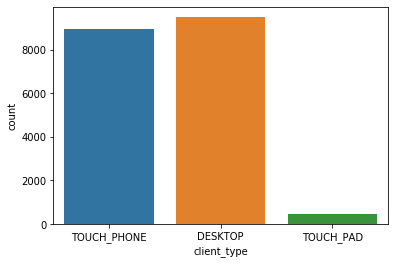

In [19]:
import seaborn as sns 
sns.countplot(search_df.groupby('query_id').first().client_type)

In [20]:
search_df.groupby('query_id').first().client_type.value_counts(normalize = True)

DESKTOP        0.501585
TOUCH_PHONE    0.473428
TOUCH_PAD      0.024987
Name: client_type, dtype: float64

#### As we see 50% of searches made from Desktop 

## In-class discussion
1. How analyzing logs can help product manager make decisions
2. Share what else you can do with this Yandex.Realty log to gain insights

## Self-control stops

1. Try to make a more detailed EDA (Exploratory Data Analysis) for better feature understanding
2. Calculate % of searches which were finished with a phone call
3. Calculate the average value for CARD_SHOW event for 1 session (query_id)
4. Try to build 3 new metrics which will help you better understand user experience, calculate them and describe why they are so important


## Exploration of categorical  variables

In [21]:
data=df.copy()

In [22]:
data[data['card_view_type']!='UNKNOWN']['card_view_type'].value_counts(normalize=True)#the majority realty card type is used

USED              0.828209
NEWBUILDING       0.123015
NEW               0.040157
COMMERCIAL        0.005256
DEVELOPER_CARD    0.002854
AGENCY_CARD       0.000509
Name: card_view_type, dtype: float64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

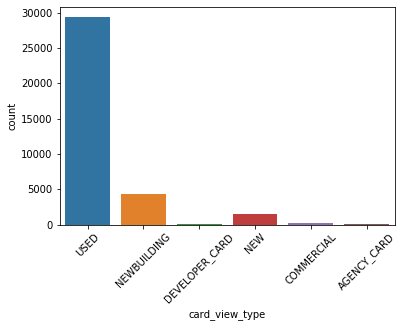

In [23]:
sns.countplot(data[data['card_view_type']!='UNKNOWN']['card_view_type'])
plt.xticks(rotation=45)

the majority realty card type is used

In [24]:
data['room_rooms_offered'].value_counts()#The fewer the number of rooms, the higher the frequency

1.0    1817
2.0      39
3.0      11
7.0       3
6.0       2
5.0       1
4.0       1
Name: room_rooms_offered, dtype: int64

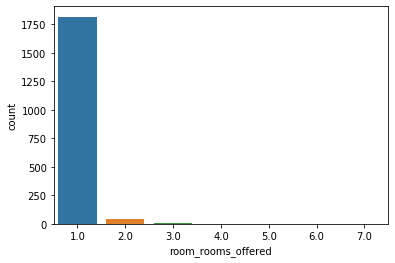

In [25]:
sns.countplot(data['room_rooms_offered'])

 As we see, the fewer the number of rooms, the higher the frequency

OFFER_CATEGORY_UNKNOWN    47522
APARTMENT                 23226
HOUSE                      3690
ROOMS                      1874
LOT                        1235
COMMERCIAL                  854
GARAGE                       35
Name: offer_category, dtype: int64


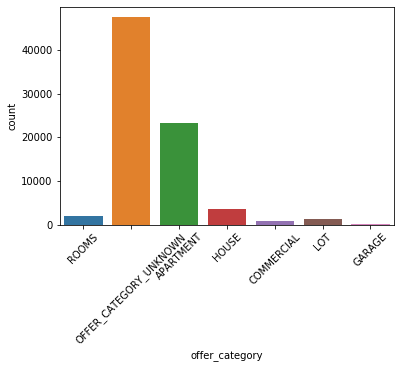

In [26]:
sns.countplot(data['offer_category'])
plt.xticks(rotation=45)
print(data['offer_category'].value_counts())

Users have the greatest demand for apartments

DESKTOP        39348
TOUCH_PHONE    37398
TOUCH_PAD       1690
Name: client_type, dtype: int64


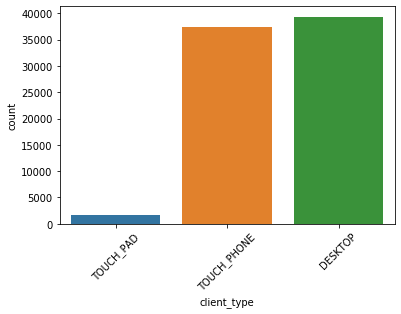

In [27]:
sns.countplot(data['client_type'])
plt.xticks(rotation=45)
print(data['client_type'].value_counts())

There are almost as many users using desttops as those using touch-phones.The numeber of users using touch_pad is the smallest.

LISTING                        38956
CARD_TOP                       30535
UNKNOWN                         4324
NEWBUILDING_LISTING             2214
NEWBUILDING_CARD_TOP            2136
DEVELOPER_CARD_TOP               101
VILLAGE_LISTING                   68
PROFESSIONAL_SEARCH_LISTING       48
CARD_RECOMMENDATIONS              20
AGENCY_CARD_TOP                   18
MAP                                8
OTHER                              5
NEWBUILDING_LISTING_PREMIUM        1
DEVELOPER_CARD_OBJECTS             1
NEWBUILDING_RECOMMENDATIONS        1
Name: event_place, dtype: int64


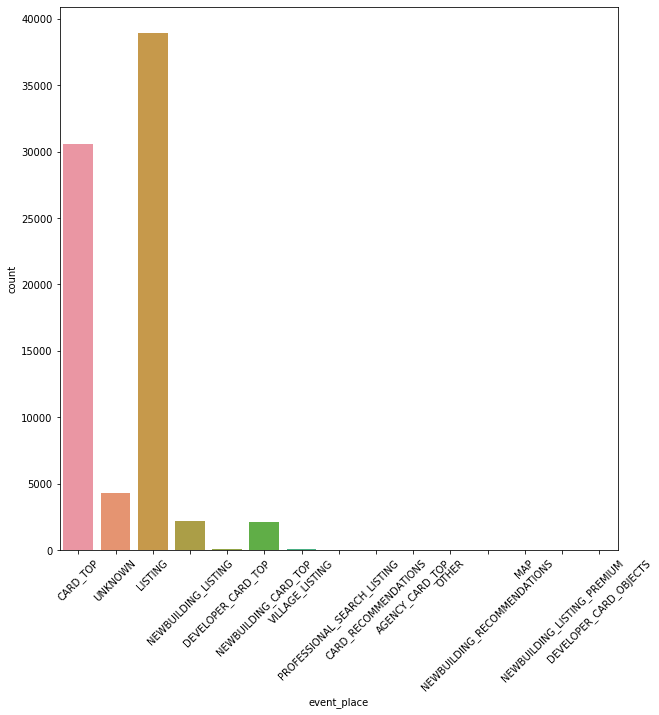

In [28]:
plt.figure(figsize=(10,10))
sns.countplot(data['event_place'])
plt.xticks(rotation=45)
print(data['event_place'].value_counts())

FLAT_TYPE_SECONDARY        10734
FLAT_TYPE_UNKNOWN           9155
FLAT_TYPE_NEW_SECONDARY     1911
FLAT_TYPE_NEW_FLAT          1426
Name: apartment_flat_type, dtype: int64


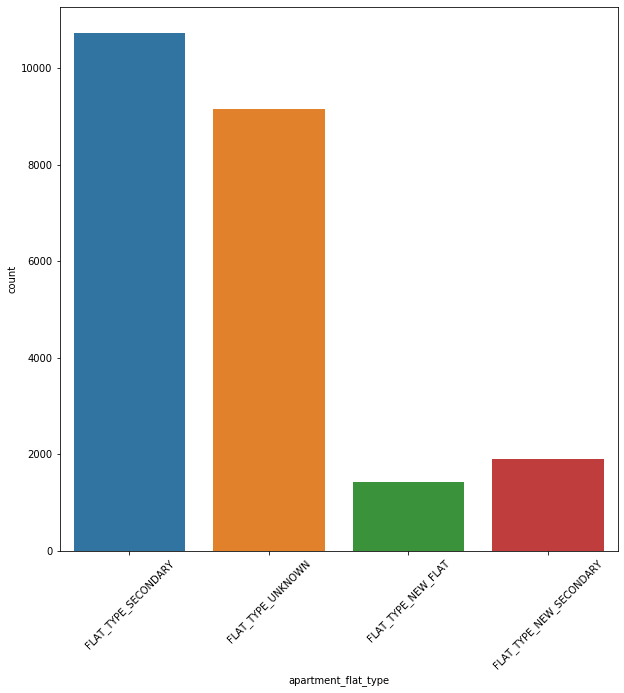

In [29]:
plt.figure(figsize=(10,10))
sns.countplot(data['apartment_flat_type'])
plt.xticks(rotation=45)
print(data['apartment_flat_type'].value_counts())

OFFER_TYPE_UNKNOWN    47522
SELL                  19450
RENT                  11464
Name: offer_type, dtype: int64


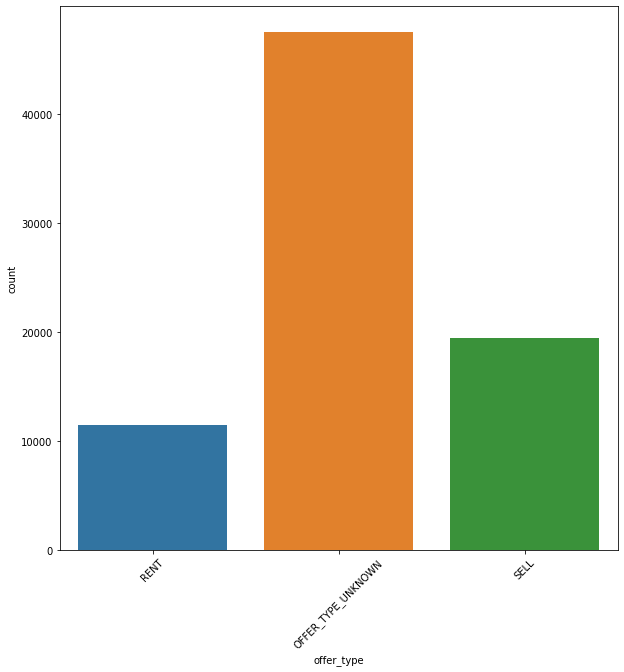

In [30]:
plt.figure(figsize=(10,10))
sns.countplot(data['offer_type'])
plt.xticks(rotation=45)
print(data['offer_type'].value_counts())

##   Exploration of numerial  variables

In [31]:
data['rent_price'].describe()

count    1.146400e+04
mean     3.271714e+04
std      1.971363e+05
min      5.000000e+02
25%      1.500000e+04
50%      2.000000e+04
75%      2.600000e+04
max      1.871700e+07
Name: rent_price, dtype: float64

In [73]:
print('min: '+str(5.000000e+02))
print('mean: '+str(3.271714e+04))    
print('median: '+str(2.000000e+04))
print('maxi: '+str(1.871700e+07))

min: 500.0
mean: 32717.14
median: 20000.0
maxi: 18717000.0


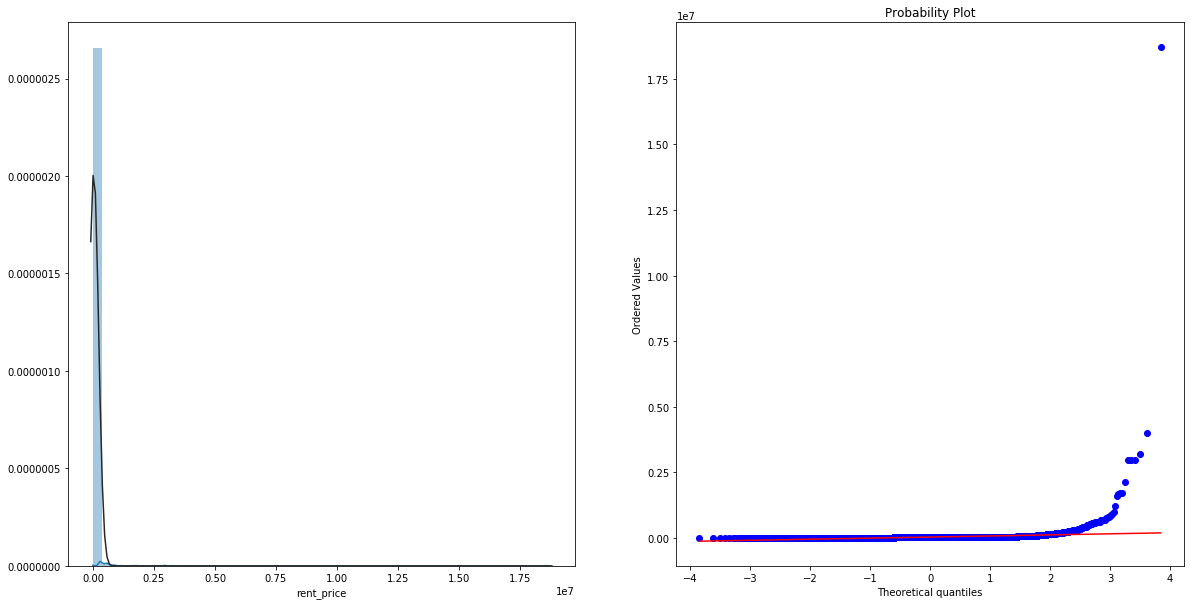

In [32]:
#Q-Q
plt.figure(figsize=(20,10))
ax=plt.subplot(1,2,1)
sns.distplot(data['rent_price'].dropna(),fit=stats.norm)
ax=plt.subplot(1,2,2)
res=stats.probplot(data['rent_price'].dropna(),plot=plt)#'rent_price is not normal disreibution

In [33]:
print("Skewness: %f" % data['rent_price'].skew())
print("Kurtosis: %f" % data['rent_price'].kurt())

Skewness: 76.684935
Kurtosis: 7076.470887


In [34]:
data['sell_price'].describe()

count    1.945000e+04
mean     7.932650e+06
std      2.428400e+07
min      5.000000e+04
25%      2.930000e+06
50%      4.599000e+06
75%      7.000000e+06
max      6.868251e+08
Name: sell_price, dtype: float64

In [74]:
print('min: '+str(5.000000e+04))
print('mean: '+str(7.932650e+06))    
print('median: '+str(4.599000e+06))
print('maxi: '+str(6.868251e+08))

min: 50000.0
mean: 7932650.0
median: 4599000.0
maxi: 686825100.0


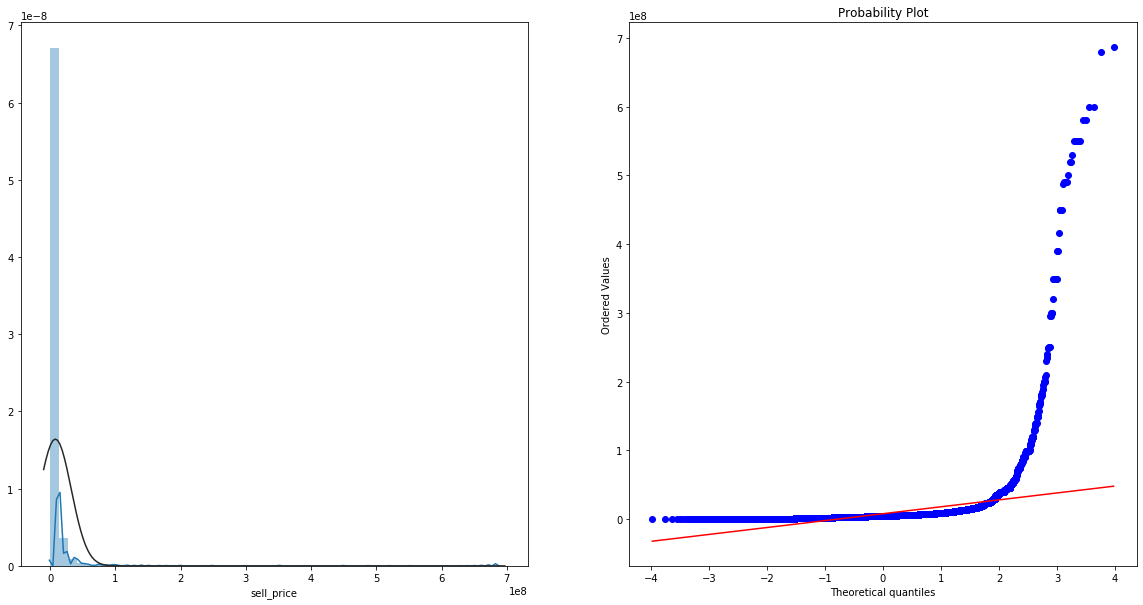

In [35]:
#Q-Q
plt.figure(figsize=(20,10))
ax=plt.subplot(1,2,1)
sns.distplot(data['sell_price'].dropna(),fit=stats.norm)
ax=plt.subplot(1,2,2)
res=stats.probplot(data['sell_price'].dropna(),plot=plt)#'sell_price is not normal disreibution

In [36]:
data['total_results'].describe()

count     78436.000000
mean       2454.341221
std       11935.381593
min           0.000000
25%           0.000000
50%          35.000000
75%         897.000000
max      645427.000000
Name: total_results, dtype: float64

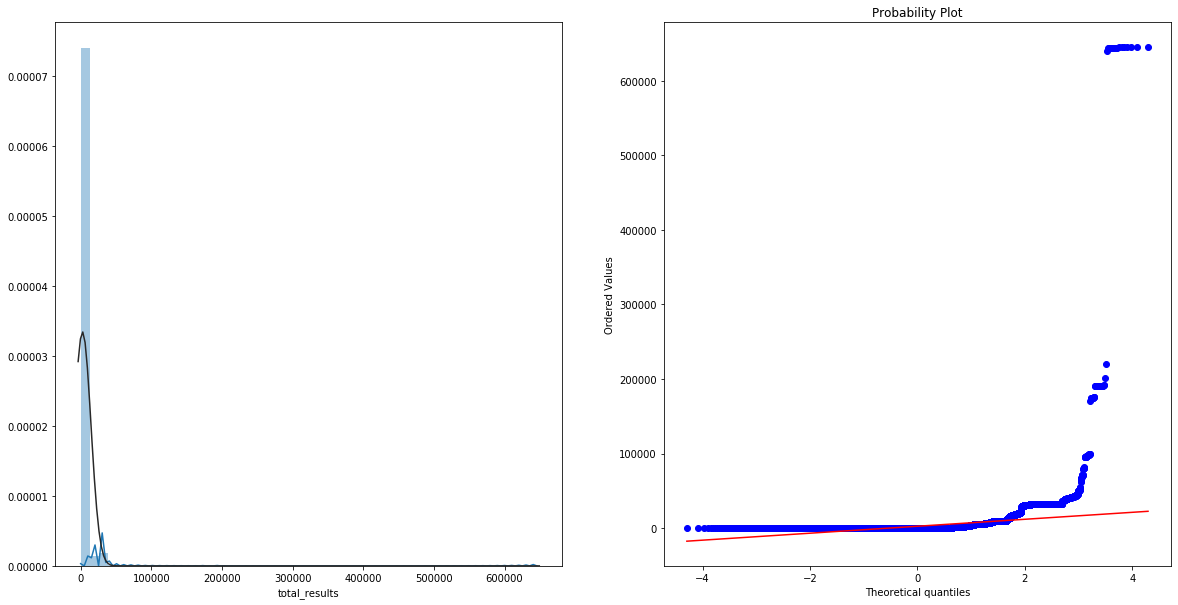

In [37]:
#Q-Q
plt.figure(figsize=(20,10))
ax=plt.subplot(1,2,1)
sns.distplot(data['total_results'].dropna(),fit=stats.norm)
ax=plt.subplot(1,2,2)
res=stats.probplot(data['total_results'].dropna(),plot=plt)#'total_results is not normal disreibution

In [38]:
print("Skewness: %f" % data['total_results'].skew())
print("Kurtosis: %f" % data['total_results'].kurt())

Skewness: 35.984291
Kurtosis: 1839.070758


In [39]:
data['apartment_total_area'].describe()

count    23226.000000
mean        50.767296
std         33.977953
min         12.000000
25%         32.400002
50%         42.200001
75%         58.799999
max        811.000000
Name: apartment_total_area, dtype: float64

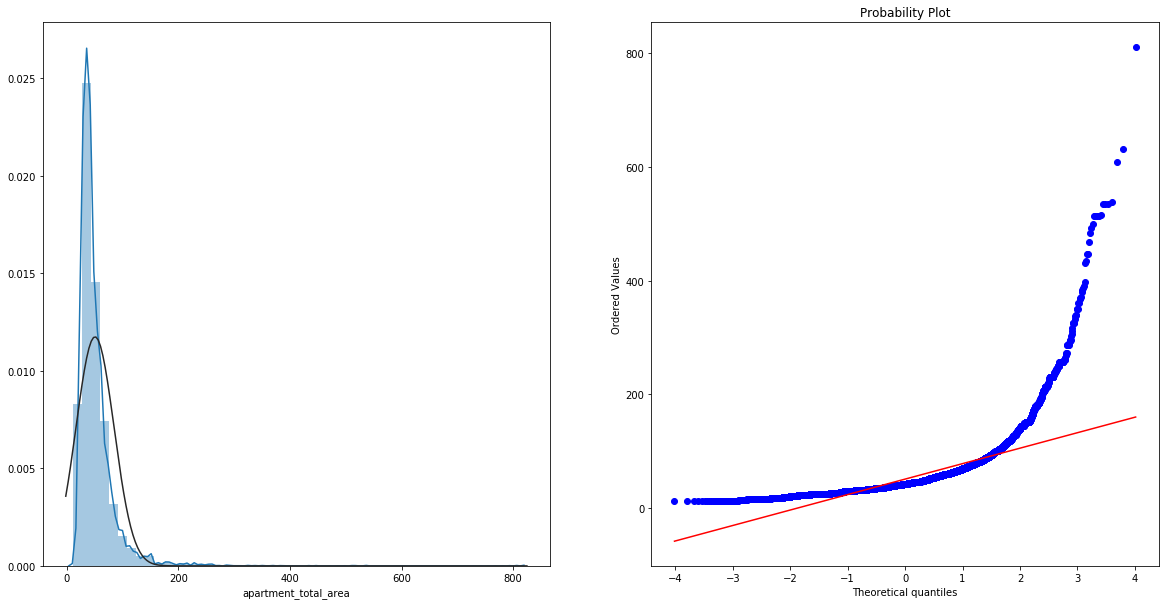

In [40]:
#Q-Q
plt.figure(figsize=(20,10))
ax=plt.subplot(1,2,1)
sns.distplot(data['apartment_total_area'].dropna(),fit=stats.norm)
ax=plt.subplot(1,2,2)
res=stats.probplot(data['apartment_total_area'].dropna(),plot=plt)

In [41]:
print("Skewness: %f" % data['apartment_total_area'].skew())
print("Kurtosis: %f" % data['apartment_total_area'].kurt())

Skewness: 5.135358
Kurtosis: 52.278742


### As we see, apartment_total_area,reent_price ,and Total_results are not normal disreibution

In [42]:
numeral=pd.concat([data['rent_price'],data['apartment_total_area'],data['total_results']],axis=1).dropna()

In [43]:
numeral['total_results'].describe()

count    9155.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: total_results, dtype: float64

In [44]:
numeral['rent_price'].describe()

count    9.155000e+03
mean     2.501658e+04
std      3.458428e+04
min      7.000000e+02
25%      1.700000e+04
50%      2.000000e+04
75%      2.600000e+04
max      1.713790e+06
Name: rent_price, dtype: float64

In [45]:
numeral['apartment_total_area'].describe()

count    9155.000000
mean       42.015373
std        24.278439
min        12.000000
25%        30.000000
50%        37.000000
75%        46.000000
max       811.000000
Name: apartment_total_area, dtype: float64

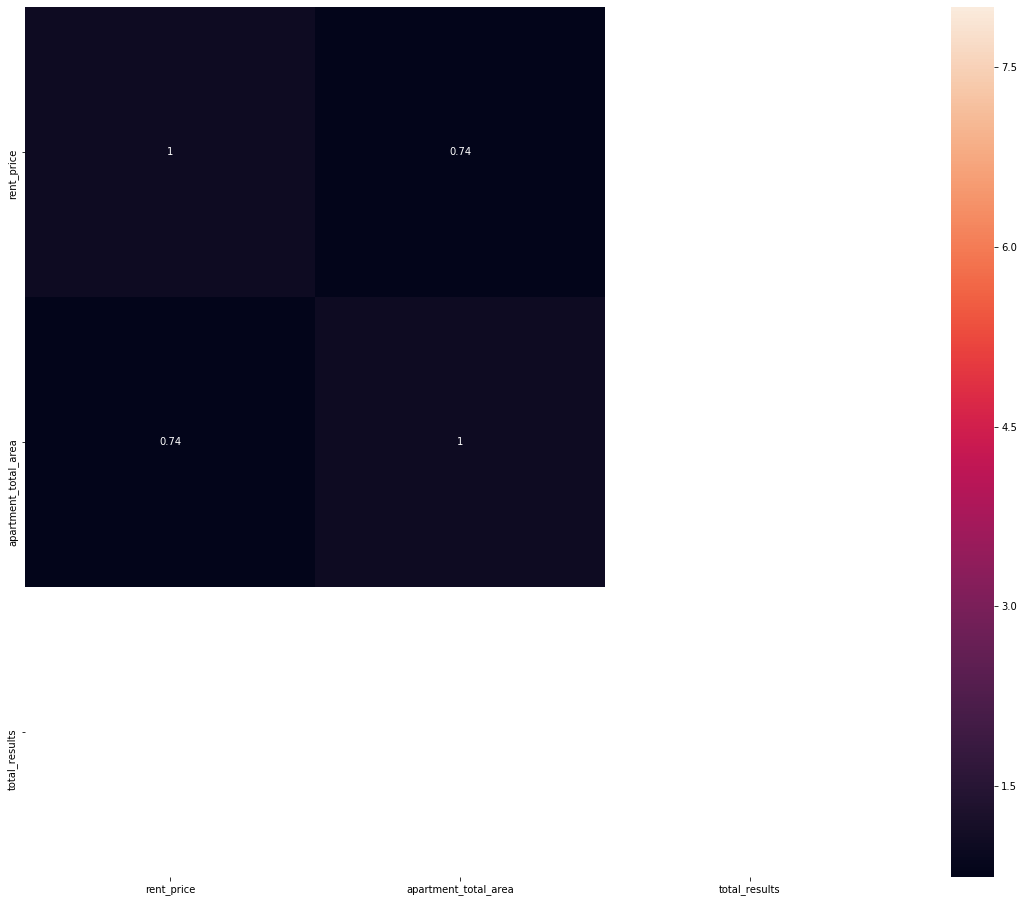

In [46]:
plt.subplots(figsize=(20,16))
sns.heatmap(numeral.corr(),vmax=8,square=True,annot=True)

When the total_reult is not 0, there is no information of rent price and apartment total area.Apartment total area and rent price are positively correlated

## Self-control stops

1. Try to make a more detailed EDA (Exploratory Data Analysis) for better feature understanding
2. Calculate % of searches which were finished with a phone call
3. Calculate the average value for CARD_SHOW event for 1 session (query_id)
4. Try to build 3 new metrics which will help you better understand user experience, calculate them and describe why they are so important

### 2.Calculate % of searches which were finished with a phone call

In [47]:
#Calculate % of searches which were finished with a phone call
df['event_type'].value_counts(normalize=True)

SEARCH_SHOW    0.576942
CARD_SHOW      0.410003
PHONE_SHOW     0.013055
Name: event_type, dtype: float64

### 3. Calculate the average value for CARD_SHOW event for 1 session (query_id)

In [48]:
#the average value for CARD_SHOW event for 1 session (query_id)

len(card_show_df.drop_duplicates())/len(data['query_id'].drop_duplicates())

0.8595079769039214

### Try to build 3 new metrics which will help you better understand user experience, calculate them and describe why they are so important

metrics 1  Percentage of reused users

In [75]:
len(data[data['query_id'].duplicated()==True])/len(data['query_id'])

0.5341042378499669

Metrics 2 :Average total_results(quantity of results for 1 query)  for per user .

In [63]:
sum(data.drop_duplicates()['total_results'])/len(data[data['query_id'].duplicated()==True])

4501.141980760509

Metrics3: Proportion of total_results=0(quantity of results for 1 query is 0)

In [68]:
len(data[data['total_results']==0])/len(data)

0.4275715232801265

## Self-control stops

### 1. Try to make a more detailed EDA (Exploratory Data Analysis) for better feature understanding

Insights:

1.The majority realty card type is used.
2.The fewer the number of rooms, the higher the frequency
3.There are almost as many users using desttops as those using touch-phones.The numeber of users using touch_pad is the smallest.
4.The most frequent event_places are listing and card-top
5.rent_price: min=500.0 mean=32717.14 median=20000.0,max=18717000.0 (not normal distribution)
6.sell_price:min=50000.0 mean=7932650.0 median=4599000.0 max=686825100.0 (not normal distribution)
7.total_results: min=0,mean=2454.34,median=35,max=645427(not normal distribution)

### 2. Calculate % of searches which were finished with a phone call

Answer:1.3055%

### 3. Calculate the average value for CARD_SHOW event for 1 session (query_id)

Answer:0.8595079769039214

### 4. Try to build 3 new metrics which will help you better understand user experience, calculate them and describe why they are so important


Metrics 1 :Percentage of reused users. 

The higher the proportion, the users are more to reused Realty and teh better user experience

len(data[data['query_id'].duplicated()==True])/len(data) =0.5341=53.41%

Metrics 2 :Average total_results(quantity of results for 1 query)  for per user .

User experience is related quantity of results for 1 query. The higher the metric, the more information each user gets, and the better the experience.

sum(data.drop_duplicates()['total_results'])/len(data[data['query_id'].duplicated()==True])=4501.1498

Metrics3: Proportion of total_results=0(quantity of results for 1 query is 0)

This metrics reflects the possibility that the user's query result is 0. The higher this metrics, the worse the user experience.

len(data[data['total_results']==0])/len(data)=0.4276=42.76%
